<a href="https://colab.research.google.com/github/Sompote/SPT/blob/main/SPT__predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import keras



df = pd.read_excel('/content/drive/MyDrive/RIC/SPT.xlsx')
data=np.array(df)
X=data[:,0:2]
y=data[:,2]
y=np.reshape(y,(X.shape[0],1))

In [ ]:
df

,s1,N,state
0,50,2,0.070462
1,100,3,0.102345
2,100,4,0.058772
3,200,7,0.074251
4,300,10,0.100299
5,400,14,0.107165
6,50,5,-0.038817
7,100,6,-0.006930
8,200,10,0.009668
9,300,12,0.034051


In [ ]:
y

array([ 0.07046233,  0.10234465,  0.05877166,  0.07425114,  0.10029862,
        0.10716516, -0.03881704, -0.00693019,  0.00966791,  0.0340507 ,
        0.03862928, -0.10925634, -0.0655215 , -0.0705835 , -0.04696137,
       -0.02369362, -0.01124502])

In [ ]:
y.shape

(17, 1)

In [ ]:
X

array([[  3.,   2.,   8.,   9.,   5.,   5.,  50.],
       [  3.,   2.,   8.,   9.,   3.,   5., 100.],
       [  3.,   2.,   8.,   9.,   6.,   5., 150.],
       [  3.,   2.,   8.,   9.,   3.,   5., 200.],
       [  3.,   2.,   8.,   9.,   2.,   5., 250.],
       [  3.,   2.,   8.,   9.,   2.,   5., 300.]])

In [ ]:
Y

array([[ 3.,  4.,  5.,  7., 10.],
       [ 6.,  8.,  9.,  1.,  6.]])

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.2984 - val_loss: 720.9495
Epoch 2/500
1/1 [==============================] - 0s 106ms/step - loss: 0.2752 - val_loss: 1118.7499
Epoch 3/500
1/1 [==============================] - 0s 140ms/step - loss: 0.2511 - val_loss: 1621.0186
Epoch 4/500
1/1 [==============================] - 0s 133ms/step - loss: 0.2277 - val_loss: 2237.2656
Epoch 5/500
1/1 [==============================] - 0s 116ms/step - loss: 0.2055 - val_loss: 2954.1841
Epoch 6/500
1/1 [==============================] - 0s 117ms/step - loss: 0.1849 - val_loss: 3763.6499
Epoch 7/500
1/1 [==============================] - 0s 127ms/step - loss: 0.1662 - val_loss: 4669.4790
Epoch 8/500
1/1 [==============================] - 0s 58ms/step - loss: 0.1496 - val_loss: 5717.0391
Epoch 9/500
1/1 [==============================] - 0s 39ms/step - loss: 0.1347 - val_loss: 6885.7852
Epoch 10/500
1/1 [==============================] - 0s 39ms/step - loss: 0.1216 - val_lo

ValueError: ignored

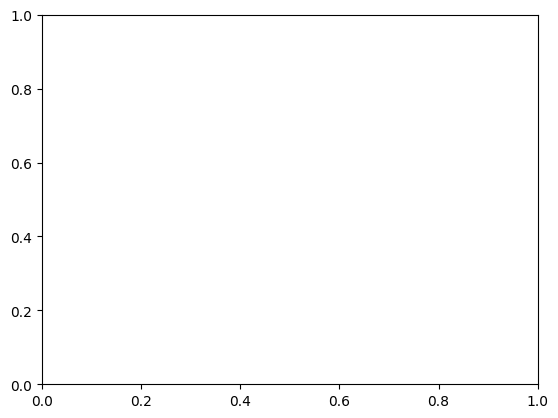

In [ ]:
# Load and preprocess data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = MinMaxScaler()
sc_y=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)

# Define neural network model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))


model.add(Dense(y_train.shape[1]))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_data=(X_test, y_test))

# Evaluate model
y_pred = model.predict(X_test)
mse = model.evaluate(X_train, y_train)
print("Mean squared error:", mse)

def mape(actual, pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100
mape_cal=mape(y_test, y_pred)
print('mape =',mape_cal)

# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Deep neural network regression")
plt.show()


In [ ]:
from pickle import dump
# save the scaler
dump(sc, open('scaler_x.pkl', 'wb'))

In [ ]:
y_train

array([[1.        ],
       [0.39535222],
       [0.        ],
       [0.28784095],
       [0.54950294],
       [0.17869223],
       [0.77639236],
       [0.66216637],
       [0.45287238],
       [0.96827238],
       [0.47280954],
       [0.68332222],
       [0.20208177],
       [0.84791705],
       [0.32547275]])

In [ ]:
# Load and preprocess data
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = MinMaxScaler()
sc_y=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)
def mape(actual, pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

# Define neural network model
model = Sequential()
model.add(Dense(10000, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(5000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))


model.add(Dense(y_train.shape[1]))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

k = 8 # number of folds kf = KFold(n_splits=k, shuffle=True, random_state=42)
kf = KFold(n_splits=k, shuffle=True, random_state=42)
mse_list = []
mape_list = []
for train_index, test_index in kf.split(X_train):
  X_train_fold, X_test_fold = X_train[train_index],X_train[test_index]
  y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
  model.fit(X_train_fold, y_train_fold, batch_size=5, epochs=500,verbose=0)
  y_pred_fold = model.predict(X_test_fold)
  mse_fold = model.evaluate(X_test_fold, y_test_fold)
  mape_fold = mape(y_test_fold, y_pred_fold)
  mse_list.append(mse_fold)
  mape_list.append(mape_fold)
  print('mean absolute percentage error:', mape_fold)
mse_avg = np.mean(mse_list)
mape_avg = np.mean(mape_list)
print('Average mean squared error:', mse_avg)
print('Average mean absolute percentage error:', mape_avg)
'''
# Train model
history = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_data=(X_test, y_test))

# Evaluate model
y_pred = model.predict(X_test)
mse = model.evaluate(X_test, y_test)
print("Mean squared error:", mse)

def mape(actual, pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100
mape_cal=mape(y_test, y_pred)
print('mape =',mape_cal)

# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Deep neural network regression")
plt.show()
'''

1/1 [==============================] - 0s 123ms/step - loss: 0.0087
mean absolute percentage error: 11.09624097902911
1/1 [==============================] - 0s 40ms/step - loss: 0.0071
mean absolute percentage error: inf


<ipython-input-2-61c3db02ca7d>:11: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


1/1 [==============================] - 0s 39ms/step - loss: 0.0033
mean absolute percentage error: 9.306364101891454
1/1 [==============================] - 0s 40ms/step - loss: 0.0071
mean absolute percentage error: 24.06953354231031
1/1 [==============================] - 0s 45ms/step - loss: 0.0019
mean absolute percentage error: 3.3384307737033323
1/1 [==============================] - 0s 32ms/step - loss: 5.8346e-04
mean absolute percentage error: 11.573809464471152
1/1 [==============================] - 0s 41ms/step - loss: 5.5486e-04
mean absolute percentage error: 12.76387018435419
1/1 [==============================] - 0s 42ms/step - loss: 2.9840e-05
mean absolute percentage error: 1.167947779131365
Average mean squared error: 0.003668512657213796
Average mean absolute percentage error: inf


'\n# Train model\nhistory = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_data=(X_test, y_test))\n\n# Evaluate model\ny_pred = model.predict(X_test)\nmse = model.evaluate(X_test, y_test)\nprint("Mean squared error:", mse)\n\ndef mape(actual, pred):\n  return np.mean(np.abs((actual - pred) / actual)) * 100\nmape_cal=mape(y_test, y_pred)\nprint(\'mape =\',mape_cal)\n\n# Plot results\nplt.scatter(y_test, y_pred)\nplt.xlabel("Actual values")\nplt.ylabel("Predicted values")\nplt.title("Deep neural network regression")\nplt.show()\n'

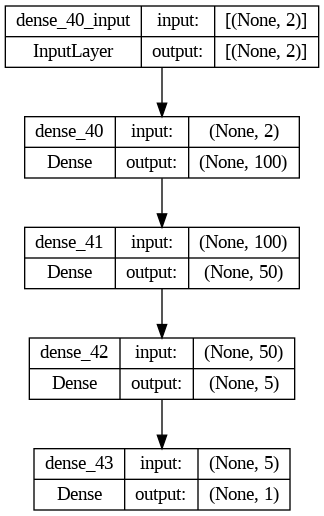

In [ ]:
# plot and save your model
import tensorflow as tf
img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [ ]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 100)               300       
                                                                 
 dense_41 (Dense)            (None, 50)                5050      
                                                                 
 dense_42 (Dense)            (None, 5)                 255       
                                                                 
 dense_43 (Dense)            (None, 1)                 6         
                                                                 
Total params: 5,611
Trainable params: 5,611
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
y_pred_fold = model.predict(X_test_fold)
mse_fold = model.evaluate(X_test_fold, y_test_fold)
mape_fold = mape(y_test_fold, y_pred_fold)
mse_list.append(mse_fold)
mape_list.append(mape_fold)
print('mean absolute percentage error:', mape_fold)


1/1 [==============================] - 0s 38ms/step - loss: 0.0039
mean absolute percentage error: 9.200652340540183


In [ ]:
mape(y_test_fold, y_pred_fold)

50.43126723863782

Epoch 1/500
4/4 [==============================] - 2s 53ms/step - loss: 0.4080 - val_loss: 0.4049
Epoch 2/500
4/4 [==============================] - 0s 18ms/step - loss: 0.4033 - val_loss: 0.4004
Epoch 3/500
4/4 [==============================] - 0s 18ms/step - loss: 0.3990 - val_loss: 0.3960
Epoch 4/500
4/4 [==============================] - 0s 17ms/step - loss: 0.3950 - val_loss: 0.3912
Epoch 5/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3895 - val_loss: 0.3841
Epoch 6/500
4/4 [==============================] - 0s 17ms/step - loss: 0.3806 - val_loss: 0.3715
Epoch 7/500
4/4 [==============================] - 0s 15ms/step - loss: 0.3662 - val_loss: 0.3536
Epoch 8/500
4/4 [==============================] - 0s 18ms/step - loss: 0.3428 - val_loss: 0.3033
Epoch 9/500
4/4 [==============================] - 0s 18ms/step - loss: 0.2846 - val_loss: 0.2378
Epoch 10/500
4/4 [==============================] - 0s 13ms/step - loss: 0.2176 - val_loss: 0.1800
Epoch 11/500
4/4 [=

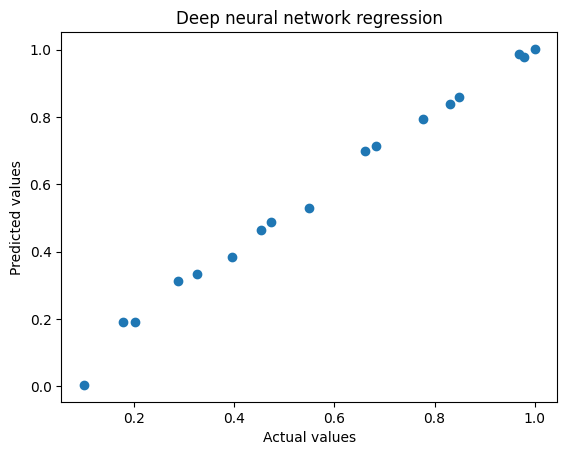

In [ ]:
# Load and preprocess data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X
y_train=y
X_test=X_train
y_test=y_train

sc = MinMaxScaler()
sc_y=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)

# Define neural network model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))


model.add(Dense(y_train.shape[1]))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, batch_size=5, epochs=500, validation_data=(X_test, y_test))

# Evaluate model
y_pred = model.predict(X_test)
mse = model.evaluate(X_train, y_train)
print("Mean squared error:", mse)

def mape(actual, pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100
y_test[y_test == 0] = 0.1
mape_cal=mape(y_test, y_pred)
print('mape =',mape_cal)

# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Deep neural network regression")
plt.show()


In [ ]:
import pickle
model.save('model.h5')
pickle.dump(sc, open('scaler.pkl', 'wb'))
pickle.dump(sc_y, open('scaler_y.pkl', 'wb'))



In [13]:
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import keras
def SPT_fee(stress=100, N=3):
  model1 = keras.models.load_model('model.h5')
  scaler_x = pickle.load(open('scaler.pkl', 'rb'))
  scaler_y = pickle.load(open('scaler_y.pkl', 'rb'))
  x = np.array([stress,N])
  x=np.reshape(x,(1,2))
  x_scale=scaler_x.transform(x)
  y_scale=model1.predict(x_scale)
  y_scale=np.reshape(y_scale,(1,1))
  y=scaler_y.inverse_transform(y_scale) #state parameter
  #calculate for friction angle
  fee=34.821-27.512*y
  return fee[0,0]
print('friction angle =',SPT_fee(stress=363,N=60), 'degree')


1/1 [==============================] - 0s 116ms/step
friction angle = 36.749664 degree


(1, 1)

In [ ]:
!pip install --upgrade -q gspread

In [ ]:
import gspread
import pandas as pd
from google.colab import auth
auth.authenticate_user()
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('SPT').sheet1
rows = worksheet.get_all_values()
df=pd.DataFrame.from_records(rows)


In [ ]:
rom sklearn.preprocessing import MinMaxScaler

import keras

datax=np.array(df)
datax=datax[1:,:]
datax=datax.astype(float)
datax
model1 = keras.models.load_model('model.h5')
scaler_x = pickle.load(open('scaler.pkl', 'rb'))
scaler_y = pickle.load(open('scaler_y.pkl', 'rb'))
x_scale=scaler_x.transform(datax)
y_scale=model1.predict(x_scale)
y=scaler_y.inverse_transform(y_scale) #state parameter
  #calculate for friction angle
fee=34.821-27.512*y
fee_list = fee.tolist()
worksheet.update('C2:C30', fee_list)
print(fee)

1/1 [==============================] - 0s 193ms/step
[[36.581062]
 [35.88448 ]
 [34.168518]
 [31.173197]
 [27.692755]
 [24.166595]
 [37.445892]
 [37.263084]
 [36.883217]
 [34.83939 ]
 [29.512749]
 [25.891731]
 [37.43396 ]
 [37.421684]
 [37.165188]
 [36.44597 ]
 [34.96586 ]
 [30.661648]
 [37.319214]
 [37.3343  ]
 [37.36273 ]
 [36.88687 ]
 [35.82845 ]
 [34.08897 ]
 [36.981956]
 [37.015377]
 [37.038002]
 [36.49786 ]
 [35.80023 ]]


In [ ]:
y

array([[-0.06397443],
       [-0.0386551 ],
       [ 0.02371621],
       [ 0.13258949],
       [ 0.25909582],
       [ 0.38726392],
       [-0.09540901],
       [-0.08876438],
       [-0.07495707],
       [-0.00066845],
       [ 0.19294311],
       [ 0.32455903],
       [-0.09497527],
       [-0.0945291 ],
       [-0.08520601],
       [-0.05906404],
       [-0.00526525],
       [ 0.1511832 ],
       [-0.09080456],
       [-0.09135293],
       [-0.09238616],
       [-0.0750898 ],
       [-0.03661861],
       [ 0.02660766],
       [-0.07854605],
       [-0.07976079],
       [-0.08058318],
       [-0.06095013],
       [-0.03559278]], dtype=float32)

In [ ]:
x.shape

(2,)

In [3]:
#calcualte fro stress
s1=5*6+4*6+8*6+9*5+9*4

In [4]:
print(s1)

183


In [5]:
#calcualte fro stress
s1=5*6+4*6+8*6+9*5+9*7+11*9+9*6

In [7]:
s1

363